# **Problema**
Una universidad quiere analizar ¿Qué factores influyen significativamente en el rendimiento académico de los estudiantes universitarios?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
url="https://raw.githubusercontent.com/conectivaoficial/analisis-tech/refs/heads/main/notas_estudiantes.csv"
df=pd.read_csv(url, sep=",")

df.head()


,carrera,genero,semestre,edad,nota,estado
0,Psicología,Otro,7,28,2.95,Reprobado
1,Derecho,Femenino,4,22,2.26,Reprobado
2,Administración,Masculino,8,23,3.11,Aprobado
3,Administración,Femenino,5,20,4.42,Aprobado
4,Administración,Masculino,7,26,2.71,Reprobado


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carrera   200 non-null    object 
 1   genero    200 non-null    object 
 2   semestre  200 non-null    int64  
 3   edad      200 non-null    int64  
 4   nota      200 non-null    float64
 5   estado    200 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


# **Preguntas de interes**
1.   ¿Existe relación entre género y estado académico?
2.   ¿Hay diferencias significativas en las notas promedio entre carreras?
3.   ¿La edad o el semestre influyen en la nota del estudiante?




In [ ]:
# Ver si el género tiene relación con el estado (aprobado o reprobado)

tabla = pd.crosstab(df['genero'], df['estado'])

# Test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

print("Tabla de contingencia:")
print(tabla)
print(f"\nChi²: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")


Tabla de contingencia:
estado     Aprobado  Reprobado
genero                        
Femenino         39         17
Masculino        51         34
Otro             39         20

Chi²: 1.4647
p-valor: 0.4808
Grados de libertad: 2


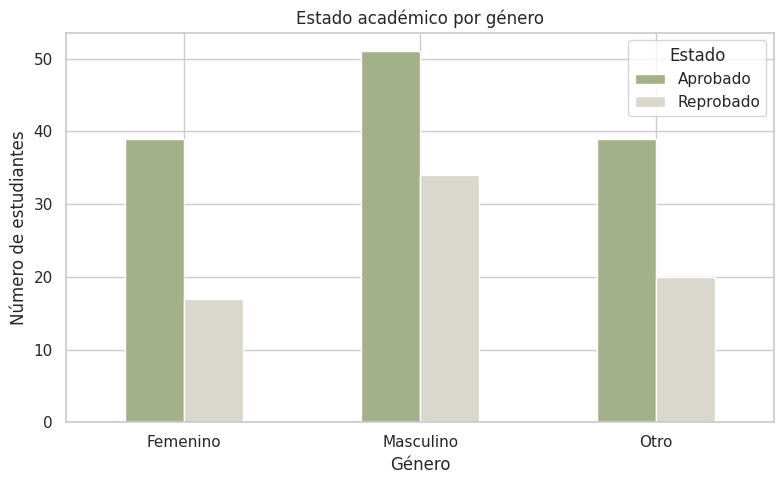

In [ ]:
tabla.plot(kind='bar', figsize=(8, 5), color=['#a3b18a', '#dad7cd'])
plt.title('Estado académico por género')
plt.xlabel('Género')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=0)
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

# OJO: No deberías concluir causalidad o relación directa solo porque una barra sea más alta.

In [ ]:
# saber si la carrera a la que pertenece el estudiante influye en su nota.
# ¿los estudiantes de Ingeniería sacan notas significativamente diferentes a los de Psicología, Derecho o Administración?

# Agrupar las notas por carrera
#grupos = df.groupby('carrera')['nota'].apply(list).tolist()
grupos = [grupo['nota'].values for _, grupo in df.groupby('carrera')]


# Aplicar ANOVA
f_stat, p_val = f_oneway(*grupos)

print("ANOVA entre carreras")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-valor: {p_val:.4f}")


ANOVA entre carreras
F-statistic: 0.1084
p-valor: 0.9551


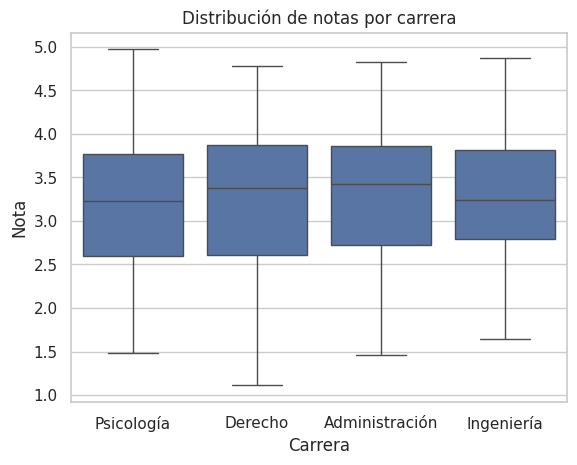

In [ ]:
sns.boxplot(x='carrera', y='nota', data=df)
plt.title('Distribución de notas por carrera')
plt.ylabel('Nota')
plt.xlabel('Carrera')
plt.show()


In [ ]:
# Aplicar prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['nota'], groups=df['carrera'], alpha=0.05)

print(tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1       group2   meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
Administración    Derecho  -0.0685 0.9787 -0.5156 0.3785  False
Administración Ingeniería   0.0203 0.9994 -0.4328 0.4734  False
Administración Psicología  -0.0308 0.9978  -0.469 0.4074  False
       Derecho Ingeniería   0.0888 0.9501 -0.3402 0.5178  False
       Derecho Psicología   0.0377 0.9953 -0.3755  0.451  False
    Ingeniería Psicología  -0.0511 0.9891 -0.4709 0.3687  False
---------------------------------------------------------------


<ipython-input-39-99556258b74c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='carrera', y='nota', palette='pastel')


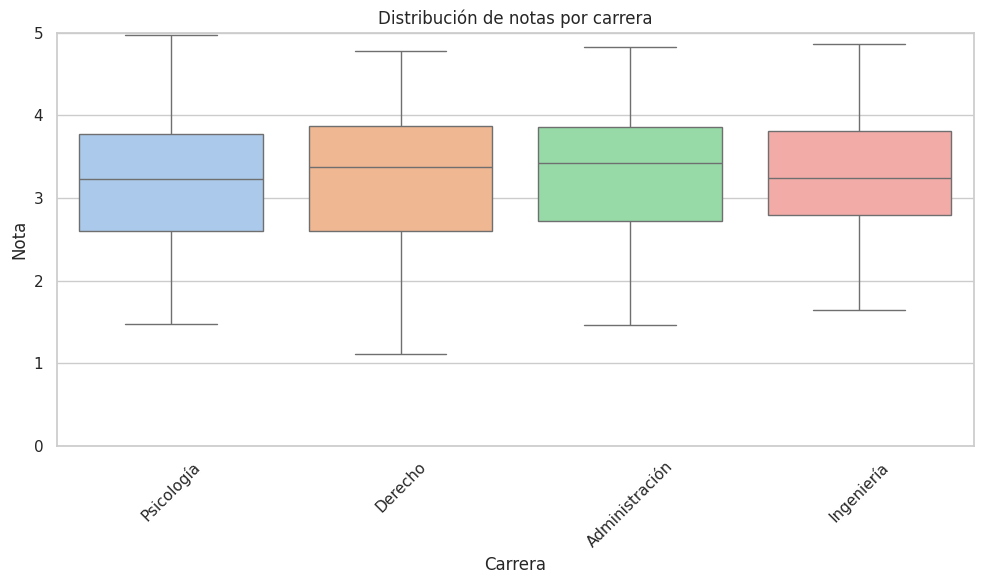

In [ ]:

# Estilo
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='carrera', y='nota', palette='pastel')

# Detalles
plt.title('Distribución de notas por carrera')
plt.xlabel('Carrera')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


In [ ]:
# Construir un modelo que diga si hay una relación lineal significativa entre:
# Variables independientes: edad y semestre
# Variable dependiente: nota

import statsmodels.api as sm

# Variables independientes y dependiente
X = df[['edad', 'semestre']]
y = df['nota']

# Agregar constante para el término independiente
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Ver resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   nota   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.783
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.171
Time:                        01:00:28   Log-Likelihood:                -243.26
No. Observations:                 200   AIC:                             492.5
Df Residuals:                     197   BIC:                             502.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0274      0.628      4.822      0.0

In [ ]:
X = df[['edad']]
y = df['nota']

# Agregar constante para el término independiente
X = sm.add_constant(X)

# Ajustar el modelo
modelo_edad = sm.OLS(y, X).fit()
print(modelo_edad.summary())

X = df[['semestre']]
y = df['nota']

# Agregar constante para el término independiente
X = sm.add_constant(X)

# Ajustar el modelo
modelo_semestre = sm.OLS(y, X).fit()

print(modelo_semestre.summary())


                            OLS Regression Results                            
Dep. Variable:                   nota   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.376
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.125
Time:                        00:51:52   Log-Likelihood:                -243.86
No. Observations:                 200   AIC:                             491.7
Df Residuals:                     198   BIC:                             498.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5597      0.459      5.583      0.0

In [5]:
X_cat = pd.get_dummies(df['genero'], drop_first=True)
print(X_cat)

     Masculino   Otro
0        False   True
1        False  False
2         True  False
3        False  False
4         True  False
..         ...    ...
195      False  False
196      False  False
197      False  False
198      False   True
199       True  False

[200 rows x 2 columns]


In [6]:
X_num = df[['edad', 'semestre']]
X = pd.concat([X_num, X_cat], axis=1)
X

,edad,semestre,Masculino,Otro
0,28,7,False,True
1,22,4,False,False
2,23,8,True,False
3,20,5,False,False
4,26,7,True,False
...,...,...,...,...
195,23,8,False,False
196,23,5,False,False
197,23,4,False,False
198,18,2,False,True


In [10]:
X = sm.add_constant(X)  # Agrega columna de 1's para estimar β₀
y = df['nota']
X = X.astype(float)
y = y.astype(float)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                   nota   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.619
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.171
Time:                        20:29:40   Log-Likelihood:                -241.79
No. Observations:                 200   AIC:                             493.6
Df Residuals:                     195   BIC:                             510.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1177      0.632      4.932      0.0

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=ecc316a93107b7151a53105fe97c0464592f901bca72e13d9532897728f26d8c
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


In [ ]:
from semopy import Model
from semopy.inspector import inspect
#Modelo de ecuaciones estructuradas
# Definir el modelo
desc = """
nota ~ edad + semestre
"""

# Crear y ajustar el modelo
model = Model(desc)
model.fit(df)

# Obtener el resumen (coeficientes, errores estándar, p-valores, etc.)
inspect(model)



,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,nota,~,edad,0.001233,0.033635,0.036665,0.970752
1,nota,~,semestre,0.036990,0.033686,1.098087,0.272166
2,nota,~~,nota,0.666749,0.066675,10.000000,0.000000
